In [101]:
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import pandas as pd

from plotly.subplots import make_subplots
from matplotlib import cm


#plt.rcParams['figure.figsize'] = [15, 5]
plt.rcParams['figure.dpi'] = 200

### Definition of multivariate non homogeneus non separable quadratic function
$$ f(x) = \frac{1}{2}x^TQx = \frac{1}{2} \sum_{i=1}^{n} Q_{ii}x_i^2 +\sum_{i=1}^{n}\sum_{j=1, j\not=i}^{n} Q_{ij}x_ix_j \qquad Q \in \mathbb{R}^{n \times n}, x \in \mathbb{R}^{n} $$

In [125]:
"""
Just implement the above shown formula for non homogeneus non separable quadratic function
"""
from matplotlib.pyplot import title


def MQF(Q, x):
    return np.dot(np.dot(x, Q), np.transpose(x))

def create_surface(Q, start=-10, stop=10, step=0.5):
    if(Q.shape[0] > 2): 
        raise ValueError("Q must be a 2x2 matrix.")

    x1s = x2s = np.arange(start, stop, step)
    X, Y = np.meshgrid(x1s, x2s)
    
    zs = []
    for x1 in x1s:
        for x2 in x2s:
            zs.append(MQF(Q, np.array([x1, x2])))

    Z = np.reshape(zs, X.shape)

    return X, Y, Z


"""
Implements plotting for 2-variate quadratic functions. Just plot 3D surface and level sets for z variable.
It also shows eigenvalues for given Q matrix
Throws ValueError if dim(Q) > 2
Available engines for plotting: matplotlib (default), plotly
"""
def plot_mqf3D(Q, start=-10, stop=10, step=0.5, engine='matplotlib'):

    if engine == 'plotly':
        lambda1, lambda2 = np.linalg.eig(Q)[0][0], np.linalg.eig(Q)[0][1]
        lambda1, lambda2 = np.round(lambda1, 2), np.round(lambda2, 2)
        X, Y, Z = create_surface(Q, start, stop, step)
        fig = make_subplots(rows=1, cols=2, 
            specs=[[{"type": "surface"}, {}]])

        fig.add_trace(go.Surface(x=X, y=Y, z=Z), row=1, col=1)
        fig.add_trace(go.Contour(z=Z), row=1, col=2)
        fig.update_layout(title_text=f'\u03BB = [{lambda1}, {lambda2}]')
        fig.update_yaxes(scaleanchor='x', scaleratio=1)
        fig.show()
    
    else:
        plot_matplotlib(Q, start, stop, step)
    
"""
Same as above, but plot with Matplotlib for static charts.
"""
def plot_matplotlib(Q, start=-10, stop=10, step=0.5):

    lambda1, lambda2 = np.linalg.eig(Q)[0][0], np.linalg.eig(Q)[0][1]
    lambda1, lambda2 = np.round(lambda1, 2), np.round(lambda2, 2)

    X, Y, Z = create_surface(Q, start, stop, step)
    fig = plt.figure()
    fig.suptitle(f'Multivariate quadratic non homogeneus function with eigenvalues \u03BB = [{lambda1}, {lambda2}]')

    ax = fig.add_subplot(121, projection='3d')
    ax.plot_surface(X, Y, Z, cmap=cm.Oranges)
    ax.set_title('3D surface')

    contour = fig.add_subplot(122)
    contour.contour(Z)
    contour.axis('square')
    contour.set_title('Level Set')
    
    plt.show()


#### First case: eigenvalues strictly negative.

In the figure below is shown that for strictly negative eigenvalues the curve level sets are _ellypsoids_.

Surface has its concavity faced to the negative side of the chart.

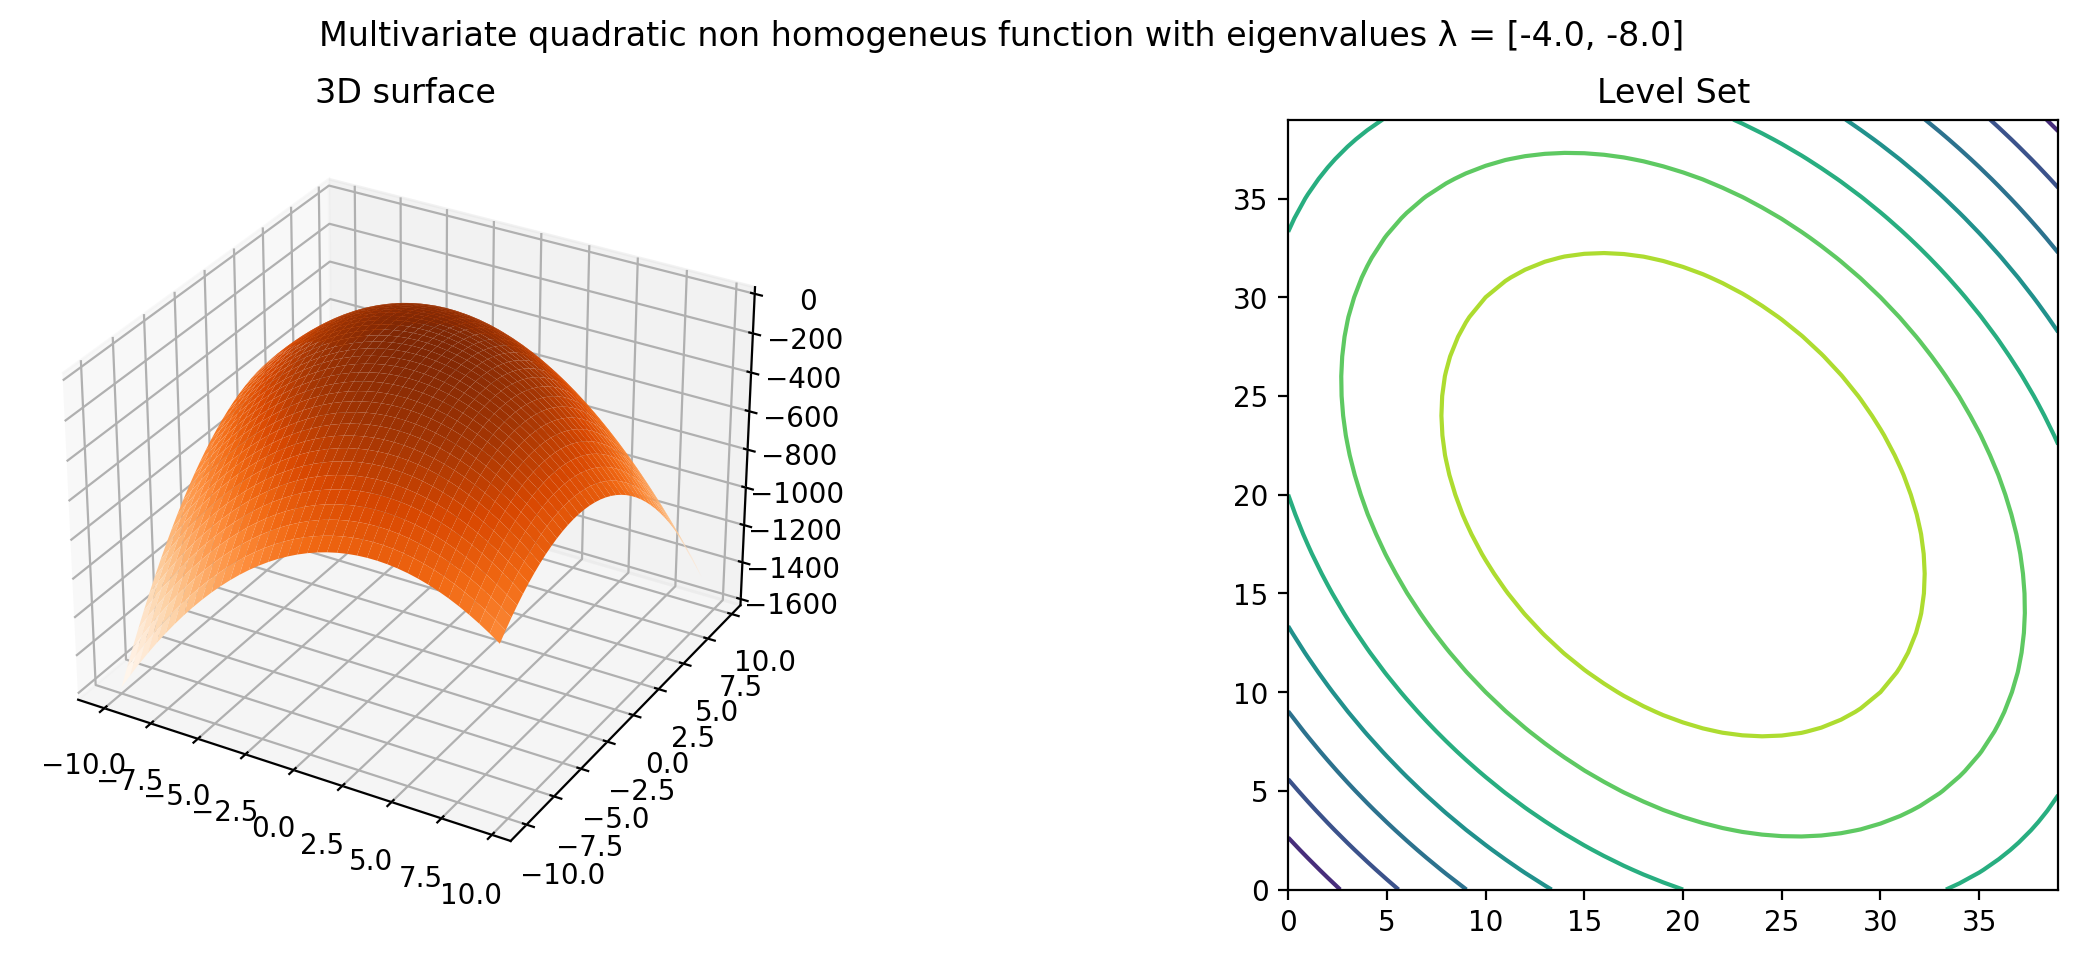

In [126]:
m = np.array([[-6, -2], [-2, -6]]) # eigenvalues are -8, -4
plot_mqf3D(m)


#### Second case: eigenvalues strictly positive.

Same as above, but now, eigenvalues are strictly positive. 

Concavity now faced towards the positive side of z axis of the chart.

Level sets are again ellypsoids. Note that level sets are "rotated" by 90 degrees since eigenvalues sign and order has changed for both

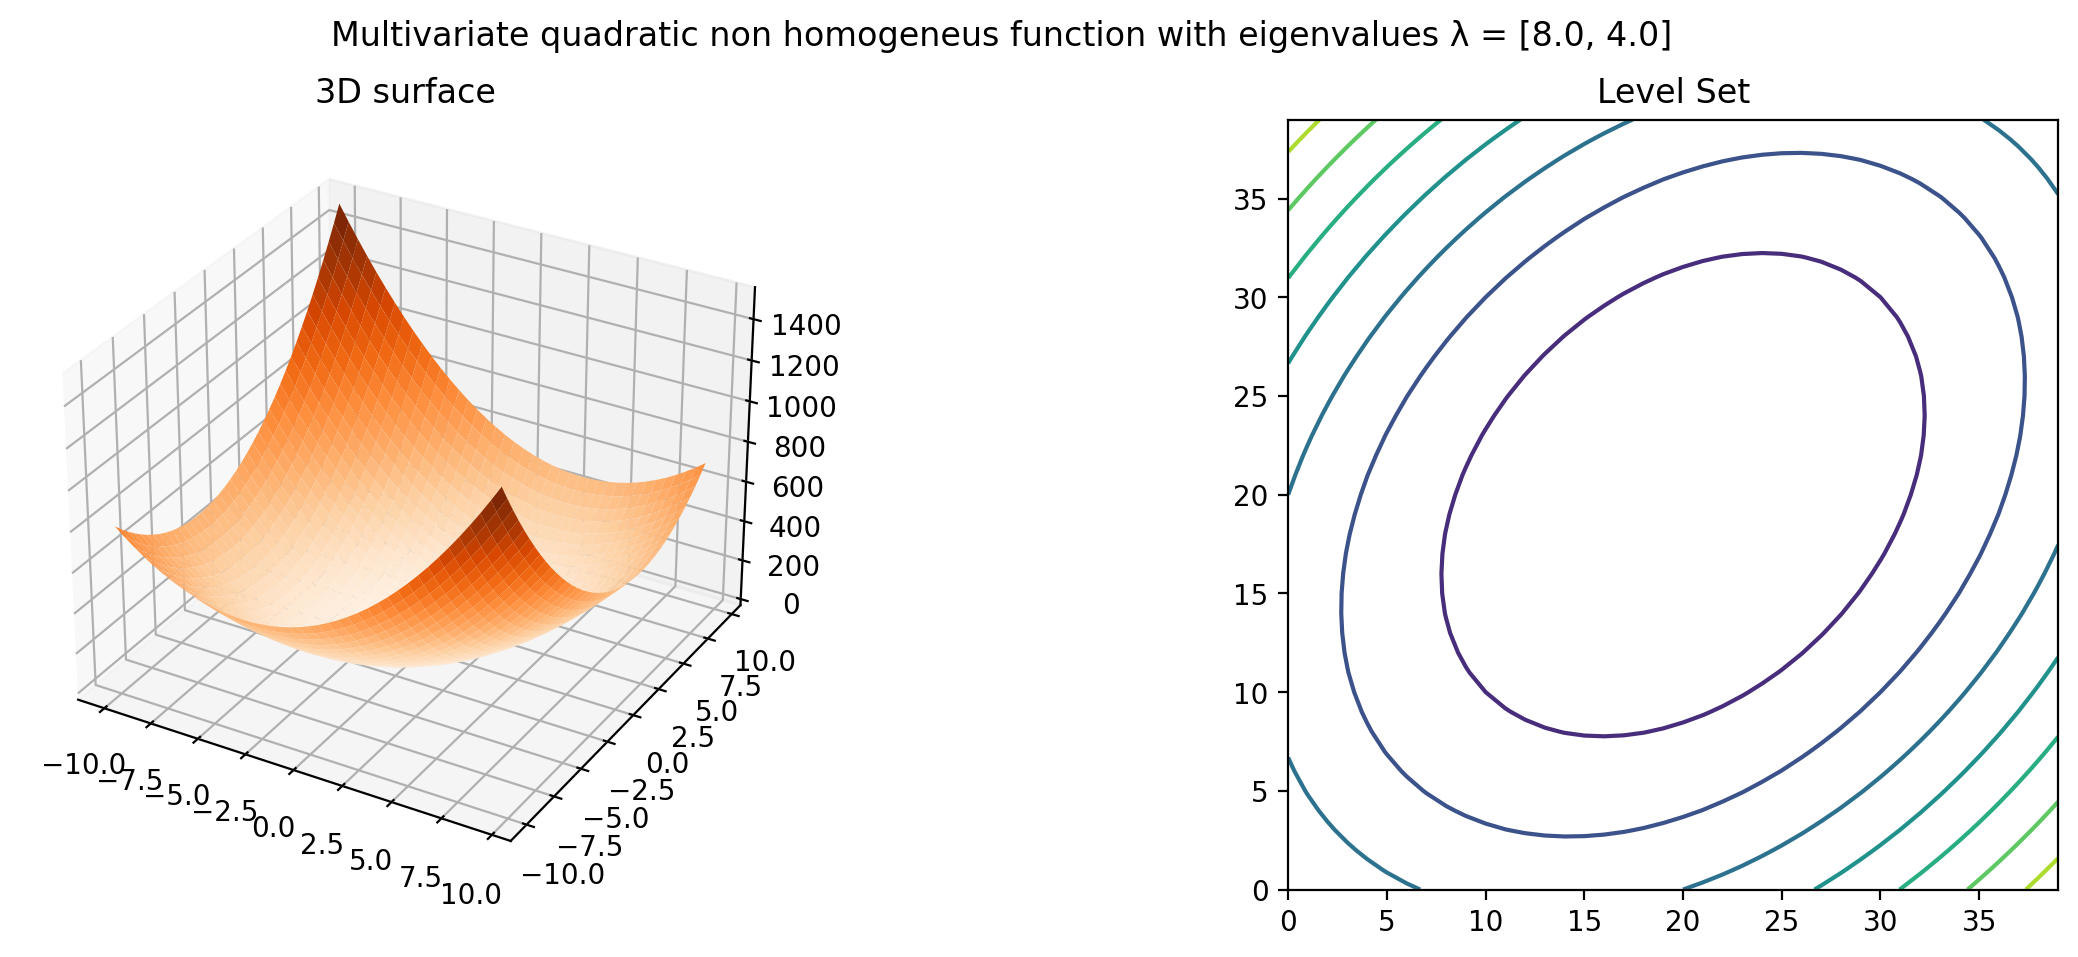

In [132]:
m = np.array([[6,-2], [-2, 6]]) #eigenvalues are 8, 4
plot_mqf3D(m)

#### Third case: one of the eigenvalues is zero

Level sets are degenerated ellypsoids.

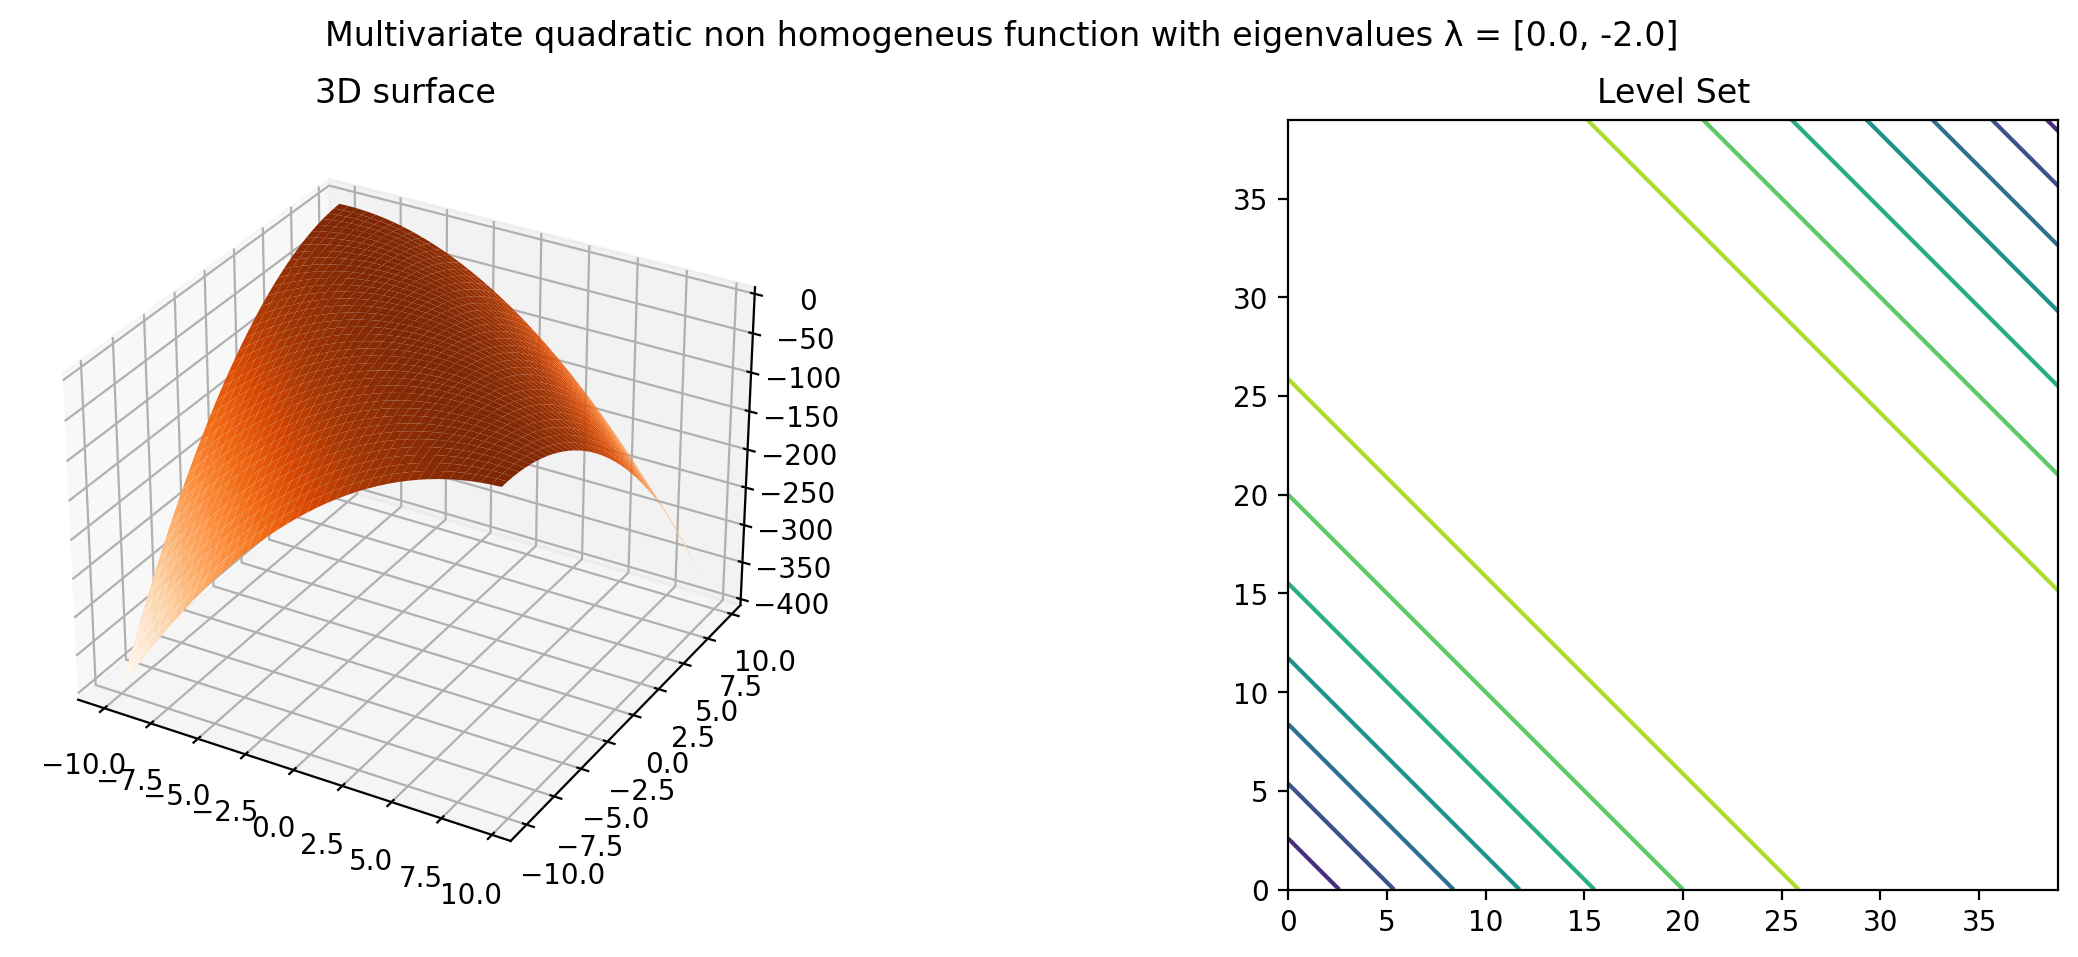

In [133]:
m = np.array([[-1, -1], [-1, -1]]) #eigenvalues are 0, -2
plot_mqf3D(m)

#### Fourth case: 2 coincidents eigenvalues

Level sets are perfect circles. (We just used the idendity matrix)

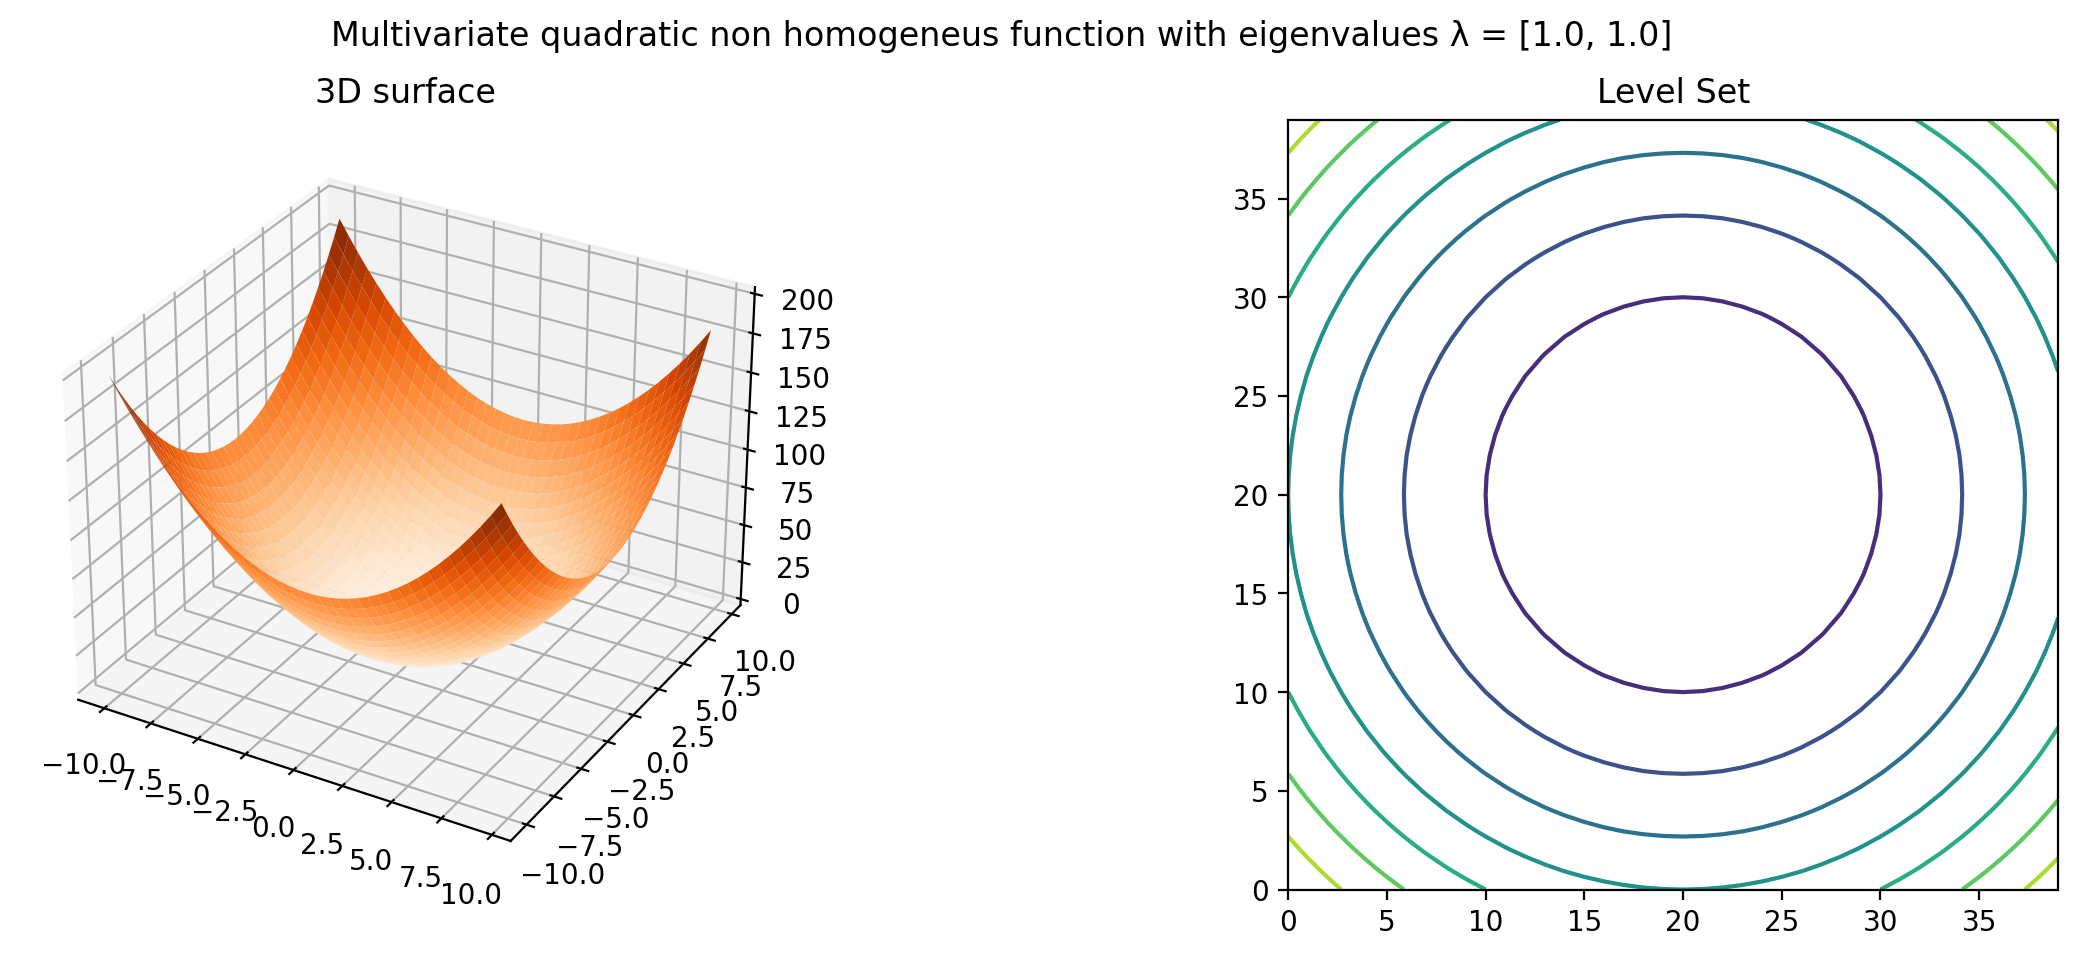

In [129]:
m = np.array([[1, 0], [0, 1]]) #eigenvalues are 1, 1
plot_mqf3D(m)

### Fifth case: one eigenvalue is positive, the other is negative.
Hyperboloids.


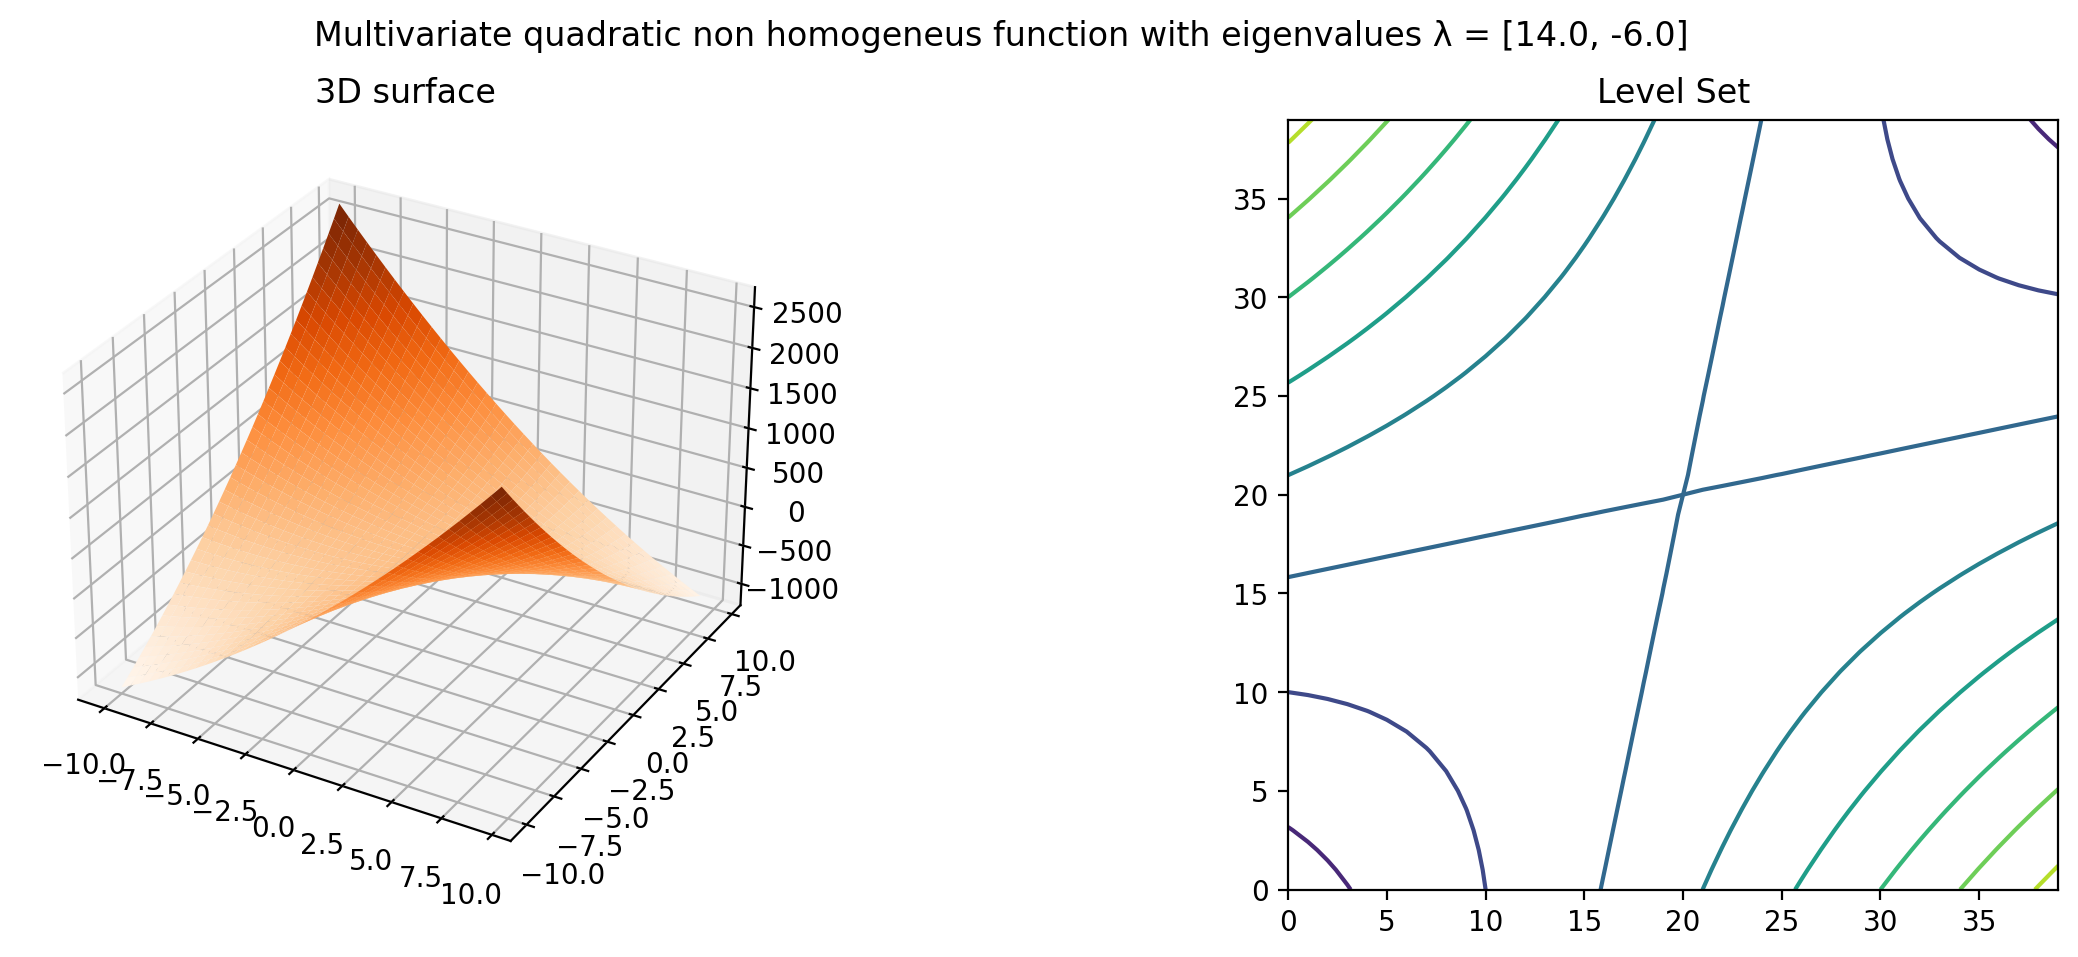

In [145]:
m = np.array([[4,-10], [-10, 4]])
plot_mqf3D(m)